# Principal Component Analysis


In [99]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

In [100]:
data = pd.read_csv('iris.data')
data.head()

,Sepal_length,Sepal_Width,Petal_length,Petal_Width,Species_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


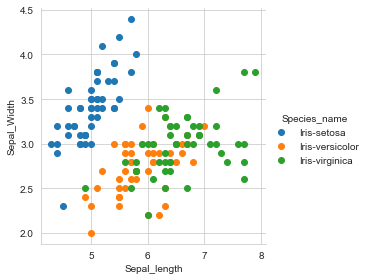

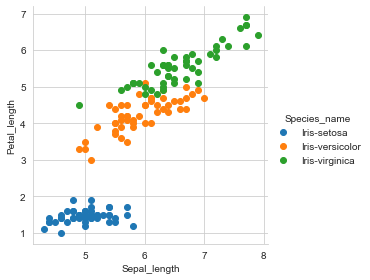

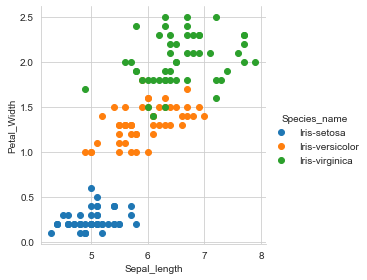

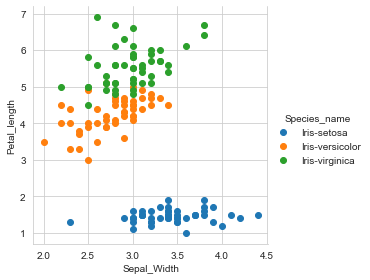

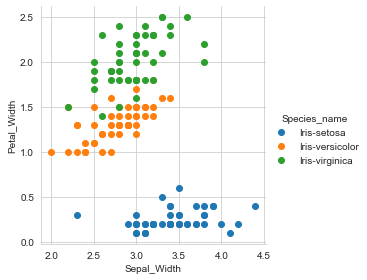

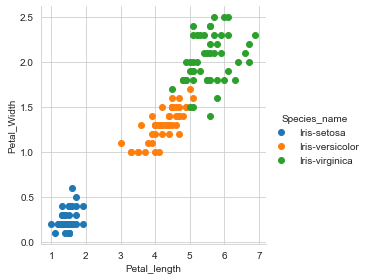

In [101]:
#Visualising Data set


sns.set_style('whitegrid');
sns.FacetGrid(data, hue='Species_name', height = 4) \
   .map(plt.scatter, 'Sepal_length','Sepal_Width') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(data, hue='Species_name', height = 4) \
   .map(plt.scatter, 'Sepal_length','Petal_length') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(data, hue='Species_name', height = 4) \
   .map(plt.scatter, 'Sepal_length','Petal_Width') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(data, hue='Species_name', height = 4) \
   .map(plt.scatter, 'Sepal_Width','Petal_length') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(data, hue='Species_name', height = 4) \
   .map(plt.scatter, 'Sepal_Width','Petal_Width') \
   .add_legend()
sns.set_style('whitegrid');
sns.FacetGrid(data, hue='Species_name', height = 4) \
   .map(plt.scatter, 'Petal_length','Petal_Width') \
   .add_legend()

In [102]:
#Normalising the data set


Data = data.drop("Species_name", axis='columns')
a=data['Species_name']
D=['sepal_length','sepal_width','petal_length','petal_width']
values = Data.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))
values.head()

,Sepal_length,Sepal_Width,Petal_length,Petal_Width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [103]:
#calculation of mean vector 


mean = []
n = 150
d=0
for i in range(0, n):
    d = d + values.Sepal_length[i]
mean.append(d/150)
d=0
for i in range(0, n):
    d = d + values.Sepal_Width[i]
mean.append(d/150)
d=0
for i in range(0, n):
    d = d + values.Petal_length[i]
mean.append(d/150)
d=0
for i in range(0, n):
    d = d + values.Petal_Width[i]
mean.append(d/150)
z=np.asmatrix(mean)
print('The mean vector is =======>')
Z=np.transpose(z)
Z

The mean vector is =======>


matrix([[0.4287037 ],
        [0.43916667],
        [0.46757062],
        [0.45777778]])

In [104]:
#Calculation of covariance matrix

val=values.values   #converting array in form of matrix
cov = (val - z).T.dot((val - z)) / (values.shape[0]-1)
print('Covariance matrix is=====> \n**************************************************************\n',cov)

Covariance matrix is=====> 
**************************************************************
 [[ 0.05290845 -0.00454496  0.05996621  0.05982683]
 [-0.00454496  0.03263959 -0.02271983 -0.02048285]
 [ 0.05996621 -0.02271983  0.08943348  0.09155279]
 [ 0.05982683 -0.02048285  0.09155279  0.1011136 ]]


In [105]:
#Calculation of Eigen value and Eigen vector

eigen_values, eigen_vectors = np.linalg.eig(cov)

print('Eigenvectors==========> \n**************************************************************\n',eigen_vectors)
print('\nEigenvalues=========> \n**************************************************************\n',eigen_values)

Eigenvectors==========> 
**************************************************************
 [[ 0.4252893  -0.42100611 -0.71434339  0.36276216]
 [-0.14612219 -0.90470509  0.33510219 -0.21877734]
 [ 0.61610511  0.06432645 -0.06825927 -0.78205964]
 [ 0.64667752  0.01116485  0.61054133  0.45708076]]

Eigenvalues=========> 
**************************************************************
 [0.23231168 0.03239279 0.00963728 0.00175337]


In [106]:
# Sorting the (eigenvalue, eigenvector)  from high to low
eig_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
0.23231167806814879
0.03239278678170276
0.009637277634355845
0.0017533717639656174


In [107]:
# Projection Matrix P of size 4X2


pro_mat = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(' Projection matrix is:\n**************************************************************\n', pro_mat)

 Projection matrix is:
**************************************************************
 [[ 0.4252893  -0.42100611]
 [-0.14612219 -0.90470509]
 [ 0.61610511  0.06432645]
 [ 0.64667752  0.01116485]]


In [108]:
#Projecting to new feature space

Y = values.dot(pro_mat)
Y['Species_name'] = a
Y.columns =['Prinple component 1', 'Prinple component 2','Species_name']
print('New feature space is=====>\n**********************************************************\n',Y)


New feature space is=====>
**********************************************************
      Prinple component 1  Prinple component 2    Species_name
0               0.071897            -0.654171     Iris-setosa
1               0.078712            -0.442302     Iris-setosa
2               0.032466            -0.495395     Iris-setosa
3               0.047625            -0.443824     Iris-setosa
4               0.053995            -0.680173     Iris-setosa
..                   ...                  ...             ...
145             1.254013            -0.601605  Iris-virginica
146             1.108536            -0.370388  Iris-virginica
147             1.149551            -0.579611  Iris-virginica
148             1.191476            -0.691736  Iris-virginica
149             1.014337            -0.511464  Iris-virginica

[150 rows x 3 columns]


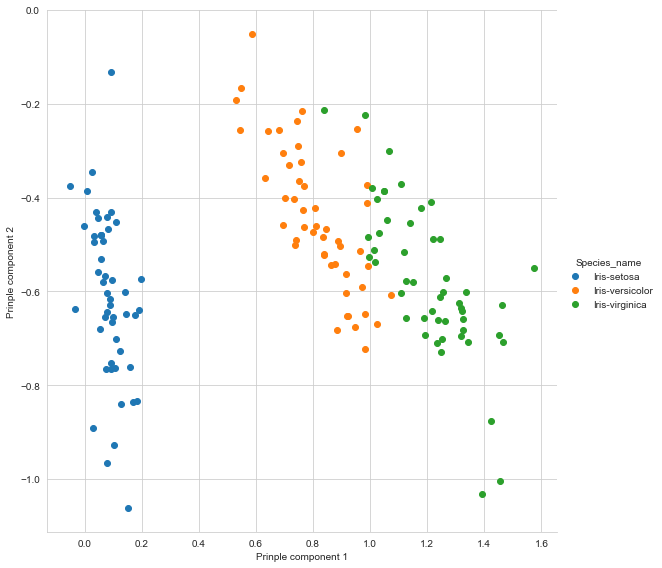

In [109]:
#Final Visualization


sns.set_style('whitegrid');
sns.FacetGrid(Y, hue='Species_name', height = 8) \
   .map(plt.scatter, 'Prinple component 1','Prinple component 2') \
   .add_legend()